# 6289dl-hw3

## Shuhan Zhang

In [3]:
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
df=pd.read_csv("/Users/apple/Documents/GWU-Class/sem2-6289dl/TSLA.csv")
print(df.shape)
df.head(5)

(1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


### 1 day lag, 4 hidden layers, batch size=32

In [10]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

# Building the input feature with time lag of 1 day
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [34]:
# Building the LSTM with 50 neurons & 4 hidden layers
model = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN (MSE loss function & Adam stochastic gradient descent optimizer)
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 22s 30ms/sample - loss: 0.0598
Epoch 2/100
740/740 [==============================] - 16s 21ms/sample - loss: 0.0160
Epoch 3/100
740/740 [==============================] - 16s 21ms/sample - loss: 0.0127
Epoch 4/100
740/740 [==============================] - 17s 22ms/sample - loss: 0.0131
Epoch 5/100
740/740 [==============================] - 16s 21ms/sample - loss: 0.0109
Epoch 6/100
740/740 [==============================] - 16s 21ms/sample - loss: 0.0129
Epoch 7/100
740/740 [==============================] - 16s 22ms/sample - loss: 0.0123
Epoch 8/100
740/740 [==============================] - 16s 22ms/sample - loss: 0.0123
Epoch 9/100
740/740 [==============================] - 22s 29ms/sample - loss: 0.0105
Epoch 10/100
740/740 [==============================] - 26s 35ms/sample - loss: 0.0105
Epoch 11/100
740/740 [==============================] - 28s 38ms/sample - loss: 0.0102
Epoch 12/100
740/740 [=========

740/740 [==============================] - 35s 48ms/sample - loss: 0.0031
Epoch 96/100
740/740 [==============================] - 28s 38ms/sample - loss: 0.0030
Epoch 97/100
740/740 [==============================] - 34s 46ms/sample - loss: 0.0029
Epoch 98/100
740/740 [==============================] - 34s 46ms/sample - loss: 0.0028
Epoch 99/100
740/740 [==============================] - 34s 45ms/sample - loss: 0.0034
Epoch 100/100
740/740 [==============================] - 27s 37ms/sample - loss: 0.0026


In [30]:
# Prepare the test data
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [35]:
# Making predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

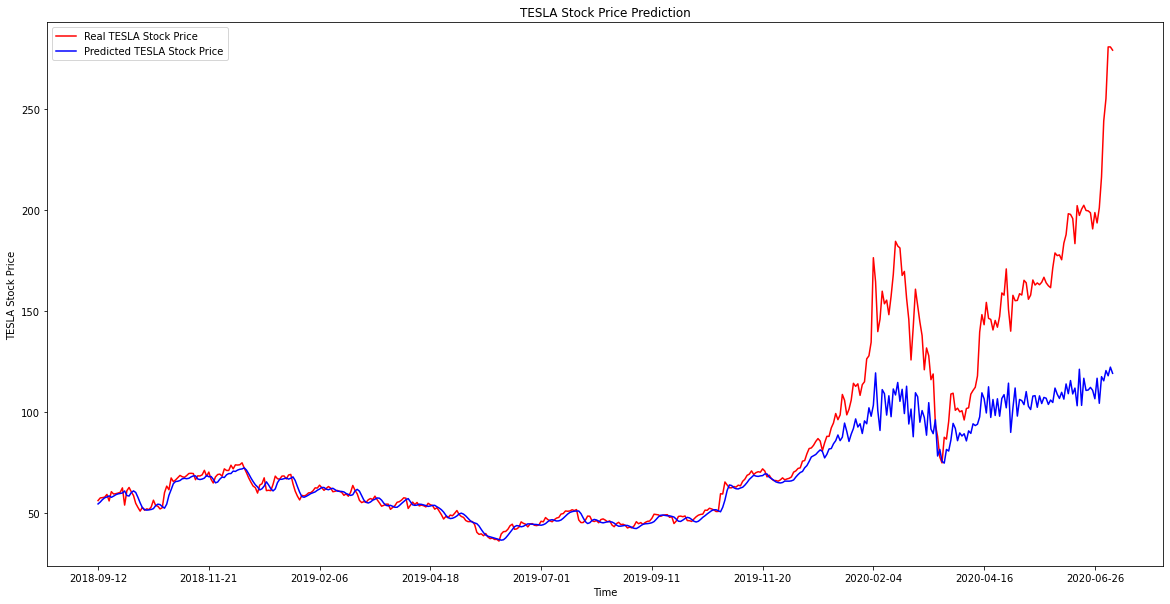

In [36]:
# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

### 1 day lag, 6 hidden layers, batch size=32

In [22]:
# Building the LSTM with 50 neurons & 6 hidden layers
model2 = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN (MSE loss function & Adam stochastic gradient descent optimizer)
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 33s 45ms/sample - loss: 0.0840
Epoch 2/100
740/740 [==============================] - 31s 42ms/sample - loss: 0.0202
Epoch 3/100
740/740 [==============================] - 25s 34ms/sample - loss: 0.0152
Epoch 4/100
740/740 [==============================] - 24s 33ms/sample - loss: 0.0156
Epoch 5/100
740/740 [==============================] - 25s 33ms/sample - loss: 0.0161
Epoch 6/100
740/740 [==============================] - 26s 34ms/sample - loss: 0.0138
Epoch 7/100
740/740 [==============================] - 26s 34ms/sample - loss: 0.0147
Epoch 8/100
740/740 [==============================] - 26s 35ms/sample - loss: 0.0139
Epoch 9/100
740/740 [==============================] - 28s 38ms/sample - loss: 0.0150
Epoch 10/100
740/740 [==============================] - 27s 36ms/sample - loss: 0.0133
Epoch 11/100
740/740 [==============================] - 32s 43ms/sample - loss: 0.0116
Epoch 12/100
740/740 [=========

740/740 [==============================] - 37s 49ms/sample - loss: 0.0033
Epoch 96/100
740/740 [==============================] - 42s 57ms/sample - loss: 0.0036
Epoch 97/100
740/740 [==============================] - 32s 43ms/sample - loss: 0.0039
Epoch 98/100
740/740 [==============================] - 50s 67ms/sample - loss: 0.0036
Epoch 99/100
740/740 [==============================] - 48s 65ms/sample - loss: 0.0033
Epoch 100/100
740/740 [==============================] - 40s 54ms/sample - loss: 0.0031


In [27]:
# Making predictions using the test set
predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

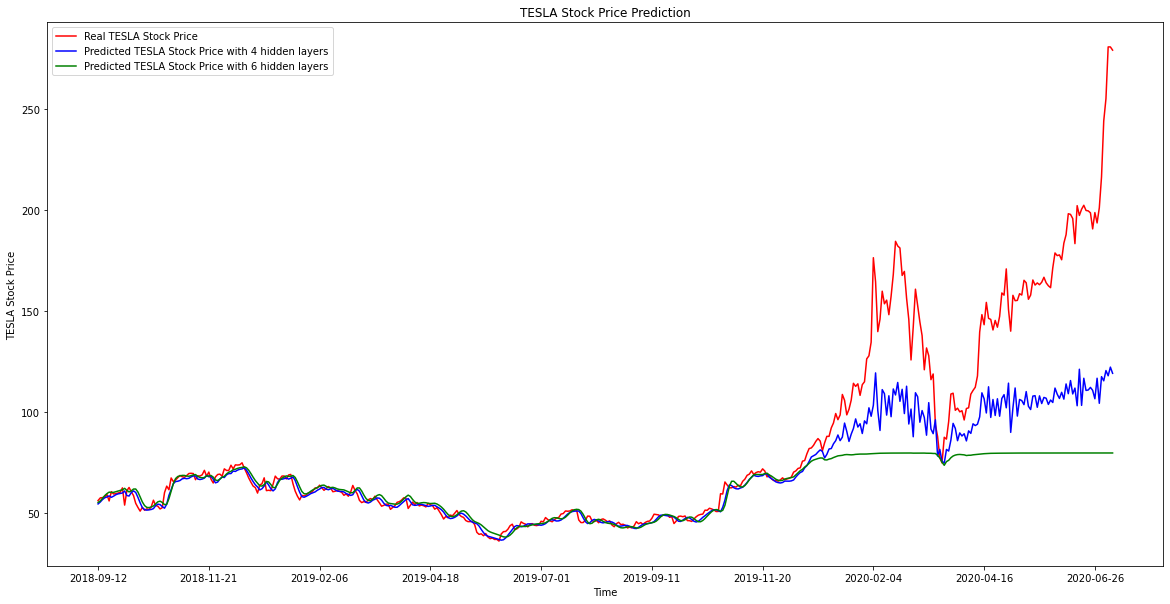

In [38]:
# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 hidden layers')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price2, color = 'green', label = 'Predicted TESLA Stock Price with 6 hidden layers')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

We can see that using 4 hidden layers gets a better performance comparing to using 6 hidden layers.

### 1 day lag, 4 hidden layers, batch size=64

In [25]:
# Building the LSTM with 50 neurons & 4 hidden layers
model3 = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50))
model3.add(Dropout(0.2))
# Adding the output layer
model3.add(Dense(units = 1))

# Compiling the RNN (MSE loss function & Adam stochastic gradient descent optimizer)
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model3.fit(X_train, y_train, epochs = 100, batch_size = 64)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 15s 20ms/sample - loss: 0.1026
Epoch 2/100
740/740 [==============================] - 10s 14ms/sample - loss: 0.0249
Epoch 3/100
740/740 [==============================] - 10s 14ms/sample - loss: 0.0169
Epoch 4/100
740/740 [==============================] - 9s 12ms/sample - loss: 0.0127
Epoch 5/100
740/740 [==============================] - 10s 14ms/sample - loss: 0.0118
Epoch 6/100
740/740 [==============================] - 13s 18ms/sample - loss: 0.0118
Epoch 7/100
740/740 [==============================] - 12s 17ms/sample - loss: 0.0123
Epoch 8/100
740/740 [==============================] - 12s 17ms/sample - loss: 0.0107
Epoch 9/100
740/740 [==============================] - 14s 19ms/sample - loss: 0.0113
Epoch 10/100
740/740 [==============================] - 11s 15ms/sample - loss: 0.0109
Epoch 11/100
740/740 [==============================] - 12s 17ms/sample - loss: 0.0114
Epoch 12/100
740/740 [==========

740/740 [==============================] - 17s 22ms/sample - loss: 0.0047
Epoch 96/100
740/740 [==============================] - 15s 20ms/sample - loss: 0.0044
Epoch 97/100
740/740 [==============================] - 14s 19ms/sample - loss: 0.0040
Epoch 98/100
740/740 [==============================] - 18s 24ms/sample - loss: 0.0042
Epoch 99/100
740/740 [==============================] - 13s 18ms/sample - loss: 0.0042
Epoch 100/100
740/740 [==============================] - 15s 21ms/sample - loss: 0.0037


In [39]:
# Making predictions using the test set
predicted_stock_price3 = model3.predict(X_test)
predicted_stock_price3 = sc.inverse_transform(predicted_stock_price3)

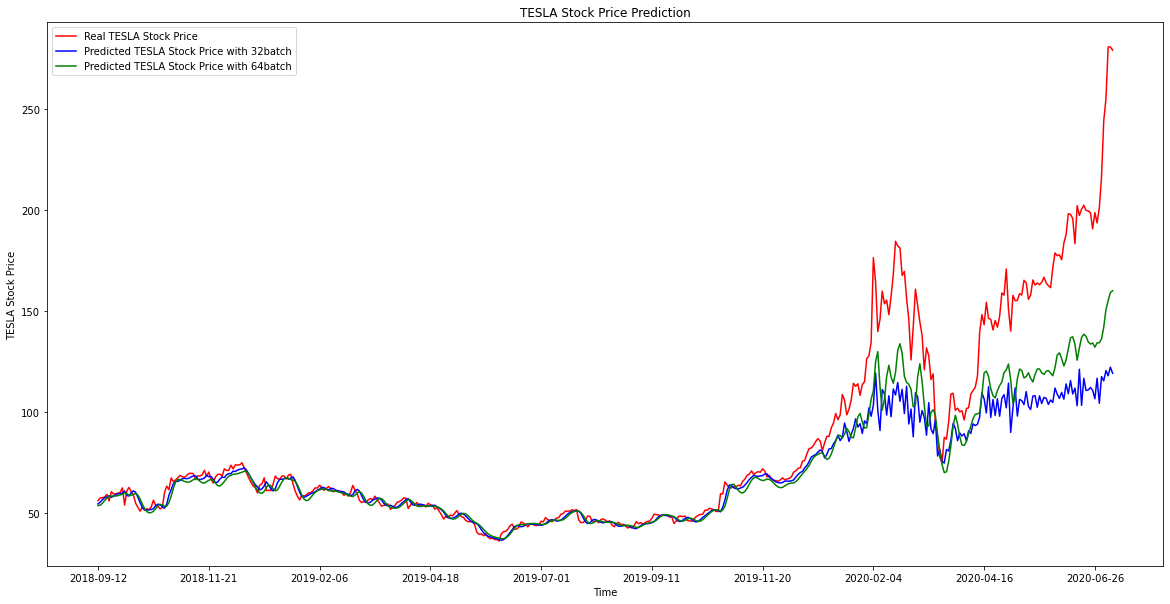

In [40]:
# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 32batch')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price3, color = 'green', label = 'Predicted TESLA Stock Price with 64batch')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Using a batch size of 64 gets better performance than using a batch size of 32.

### 7 day lag, 4 hidden layers, batch size=32

In [41]:
# Building the input feature with time lag of 7 day
# Creating a data structure with 60 time-steps and 1 output
X_train2 = []
y_train2 = []
for i in range(67, 800):
    X_train2.append(training_set_scaled[i-67:i-7, 0])
    y_train2.append(training_set_scaled[i, 0])
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))

In [42]:
# Building the LSTM with 50 neurons & 4 hidden layers
model4 = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model4.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model4.add(LSTM(units = 50))
model4.add(Dropout(0.2))
# Adding the output layer
model4.add(Dense(units = 1))

# Compiling the RNN (MSE loss function & Adam stochastic gradient descent optimizer)
model4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model4.fit(X_train2, y_train2, epochs = 100, batch_size = 32)

Train on 733 samples
Epoch 1/100
733/733 [==============================] - 22s 30ms/sample - loss: 0.0705
Epoch 2/100
733/733 [==============================] - 16s 22ms/sample - loss: 0.0191
Epoch 3/100
733/733 [==============================] - 20s 27ms/sample - loss: 0.0168
Epoch 4/100
733/733 [==============================] - 23s 31ms/sample - loss: 0.0156
Epoch 5/100
733/733 [==============================] - 22s 30ms/sample - loss: 0.0163
Epoch 6/100
733/733 [==============================] - 20s 28ms/sample - loss: 0.0165
Epoch 7/100
733/733 [==============================] - 20s 27ms/sample - loss: 0.0162
Epoch 8/100
733/733 [==============================] - 23s 31ms/sample - loss: 0.0148
Epoch 9/100
733/733 [==============================] - 27s 37ms/sample - loss: 0.0149
Epoch 10/100
733/733 [==============================] - 30s 41ms/sample - loss: 0.0152
Epoch 11/100
733/733 [==============================] - 28s 38ms/sample - loss: 0.0150
Epoch 12/100
733/733 [=========

733/733 [==============================] - 23s 31ms/sample - loss: 0.0052
Epoch 96/100
733/733 [==============================] - 20s 27ms/sample - loss: 0.0051
Epoch 97/100
733/733 [==============================] - 19s 26ms/sample - loss: 0.0059
Epoch 98/100
733/733 [==============================] - 23s 31ms/sample - loss: 0.0053
Epoch 99/100
733/733 [==============================] - 23s 31ms/sample - loss: 0.0049
Epoch 100/100
733/733 [==============================] - 23s 32ms/sample - loss: 0.0054


In [43]:
# Prepare the test data
X_test2 = []
for i in range(67, 519):
    X_test2.append(inputs[i-67:i-7, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
print(X_test2.shape)

(452, 60, 1)


In [44]:
# Making predictions using the test set
predicted_stock_price4 = model4.predict(X_test2)
predicted_stock_price4 = sc.inverse_transform(predicted_stock_price4)

### 14 day lag, 4 hidden layers, batch size=32

In [47]:
# Building the input feature with time lag of 14 day
# Creating a data structure with 60 time-steps and 1 output
X_train3 = []
y_train3 = []
for i in range(74, 800):
    X_train3.append(training_set_scaled[i-74:i-14, 0])
    y_train3.append(training_set_scaled[i, 0])
X_train3, y_train3 = np.array(X_train3), np.array(y_train3)
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))

In [48]:
# Building the LSTM with 50 neurons & 4 hidden layers
model5 = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model5.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50, return_sequences = True))
model5.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50, return_sequences = True))
model5.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model5.add(LSTM(units = 50))
model5.add(Dropout(0.2))
# Adding the output layer
model5.add(Dense(units = 1))

# Compiling the RNN (MSE loss function & Adam stochastic gradient descent optimizer)
model5.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model5.fit(X_train3, y_train3, epochs = 100, batch_size = 32)

Train on 726 samples
Epoch 1/100
726/726 [==============================] - 26s 36ms/sample - loss: 0.0729
Epoch 2/100
726/726 [==============================] - 15s 21ms/sample - loss: 0.0234
Epoch 3/100
726/726 [==============================] - 16s 21ms/sample - loss: 0.0199
Epoch 4/100
726/726 [==============================] - 18s 25ms/sample - loss: 0.0199
Epoch 5/100
726/726 [==============================] - 22s 31ms/sample - loss: 0.0214
Epoch 6/100
726/726 [==============================] - 22s 30ms/sample - loss: 0.0188
Epoch 7/100
726/726 [==============================] - 21s 29ms/sample - loss: 0.0182
Epoch 8/100
726/726 [==============================] - 21s 28ms/sample - loss: 0.0178
Epoch 9/100
726/726 [==============================] - 19s 27ms/sample - loss: 0.0176
Epoch 10/100
726/726 [==============================] - 19s 27ms/sample - loss: 0.0189
Epoch 11/100
726/726 [==============================] - 21s 30ms/sample - loss: 0.0180
Epoch 12/100
726/726 [=========

726/726 [==============================] - 20s 28ms/sample - loss: 0.0050
Epoch 96/100
726/726 [==============================] - 21s 30ms/sample - loss: 0.0052
Epoch 97/100
726/726 [==============================] - 21s 29ms/sample - loss: 0.0055
Epoch 98/100
726/726 [==============================] - 22s 30ms/sample - loss: 0.0051
Epoch 99/100
726/726 [==============================] - 22s 31ms/sample - loss: 0.0050
Epoch 100/100
726/726 [==============================] - 21s 30ms/sample - loss: 0.0055


In [49]:
# Prepare the test data
X_test3 = []
for i in range(74, 519):
    X_test3.append(inputs[i-74:i-14, 0])
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1], 1))
print(X_test3.shape)

(445, 60, 1)


In [50]:
# Making predictions using the test set
predicted_stock_price5 = model5.predict(X_test3)
predicted_stock_price5 = sc.inverse_transform(predicted_stock_price5)

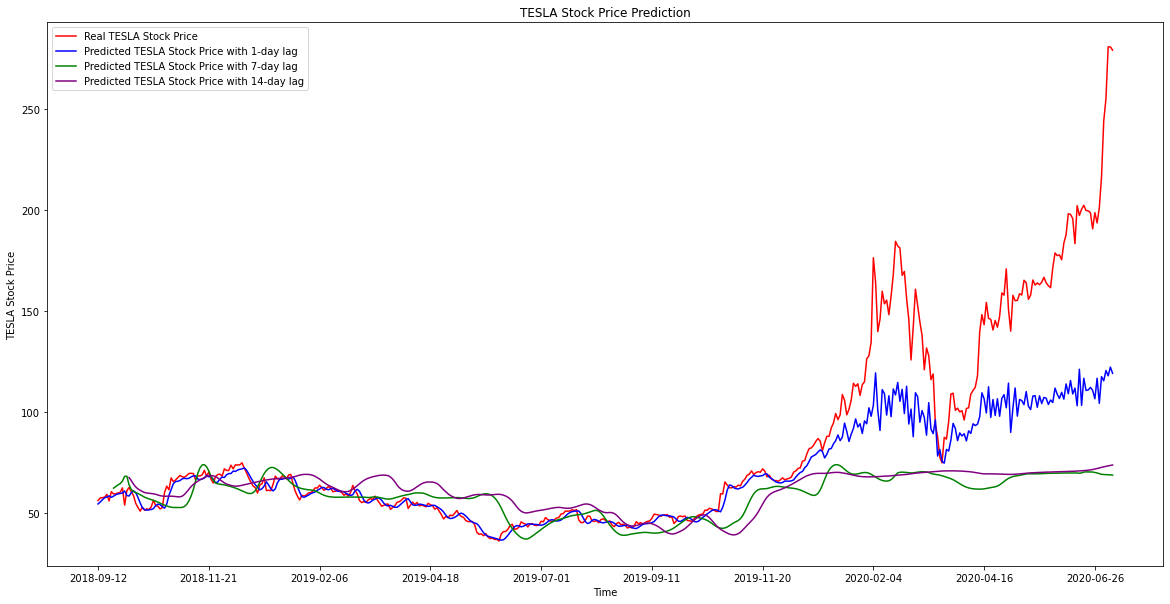

In [54]:
# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 1-day lag')
plt.plot(df.loc[800+7:, 'Date'],predicted_stock_price4, color = 'green', label = 'Predicted TESLA Stock Price with 7-day lag')
plt.plot(df.loc[800+14:, 'Date'],predicted_stock_price5, color = 'purple', label = 'Predicted TESLA Stock Price with 14-day lag')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

The plot shows that when the lag time is 1 days, the model perform best. The increase of the lag time makes the predicted stock price smoother.

### prediction

In [61]:
pred_test=dataset_test.values
pred_fit=sc.fit_transform(pred_test)

# Using the model of 14 lag time
for k in range(6):
    pred_data = []
    for i in range(14):
        pred_data.append(pred_fit[len(pred_fit)-73+i:len(pred_fit)-13+i])
    pred_data = np.array(pred_data)
    pred_data = np.reshape(pred_data, (pred_data.shape[0], pred_data.shape[1], 1))
    pred_result = model5.predict(pred_data)
    pred_fit = np.append(pred_fit,pred_result)

predict_value = sc.inverse_transform(pred_fit[-84:].reshape(84,1).tolist())

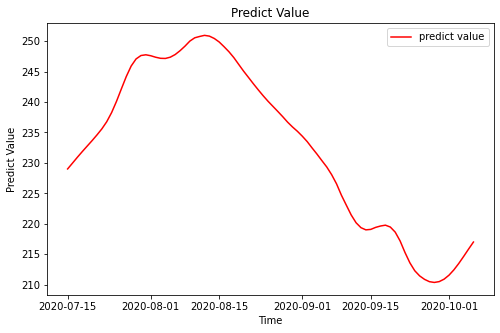

In [66]:
plt.figure(figsize=(8,5))
date=pd.date_range(start='07/15/2020', periods=84)
plt.plot(date, predict_value, color = 'red', label = 'predict value')
plt.title('Predict Value')
plt.xlabel('Time')
plt.ylabel('Predict Value')
plt.legend()
plt.plot()
plt.show()